In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from Preprocessing import Preprocessing

In [3]:
df_4800_healthy = pd.read_csv('../data/4800rpm_5kW_healthy_0.2s_0.05ms.csv')
df_4800_1turn_1rf = pd.read_csv('../data/4800rpm_5kW_1turn_1rf_0.2s_0.05ms.csv')
df_4800_1turn_001rf = pd.read_csv('../data/4800rpm_5kW_1turn_0.01rf_0.2s_0.05ms.csv')
df_4800_5turn_1rf = pd.read_csv('../data/4800rpm_5kW_5turns_1rf_0.2s_0.05ms.csv')
df_4800_5turn_001rf = pd.read_csv('../data/4800rpm_5kW_5turns_0.01rf_0.2s_0.05ms.csv')

In [4]:
preprocessed_healthy = Preprocessing(df_4800_healthy, 4800)
preprocessed_1turn_1rf = Preprocessing(df_4800_1turn_1rf, 4800)
preprocessed_1turn = Preprocessing(df_4800_1turn_001rf, 4800)
preprocessed_5turns_1rf = Preprocessing(df_4800_5turn_1rf, 4800)
preprocessed_5turns = Preprocessing(df_4800_5turn_001rf, 4800)

In [5]:
preprocessed_healthy.dataset
preprocessed_healthy.fundamental_total_sample_period(0.05)
preprocessed_healthy.nsc_augment()

preprocessed_1turn_1rf.dataset
preprocessed_1turn_1rf.fundamental_total_sample_period(0.05)
preprocessed_1turn_1rf.nsc_augment()

preprocessed_1turn.dataset
preprocessed_1turn.fundamental_total_sample_period(0.05)
preprocessed_1turn.nsc_augment()

preprocessed_5turns_1rf.dataset
preprocessed_5turns_1rf.fundamental_total_sample_period(0.05)
preprocessed_5turns_1rf.nsc_augment()

preprocessed_5turns.dataset
preprocessed_5turns.fundamental_total_sample_period(0.05)
preprocessed_5turns.nsc_augment()

d:\Programing\Python\fault_detection\A-Transformer-based-Inter-turn-short-circuit-fault-diagnosis-method-for-Permanent-Magnet-Synchronous\preprocessing\Preprocessing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.dataset['Max(A)'][i: i + self.Ns] = self.dataset.iloc[i: i + self.Ns, 1].max()
d:\Programing\Python\fault_detection\A-Transformer-based-Inter-turn-short-circuit-fault-diagnosis-method-for-Permanent-Magnet-Synchronous\preprocessing\Preprocessing.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.dataset['Max(C)'][i: i + self.Ns] = self.dataset.iloc[i: i + self.Ns, 3].max()
d:\Programing\Python

,Time [ms],Current(PhaseA) [A],Current(PhaseB) [A],Current(PhaseC) [A],NSC
0,0.00,0.000000e+00,0.000000,0.000000,12.961345
1,0.05,5.307215e-06,0.326597,-0.326603,12.961345
2,0.10,2.854332e-06,0.655197,-0.655199,12.961345
3,0.15,4.014485e-07,0.983796,-0.983796,12.961345
4,0.20,-2.051435e-06,1.312395,-1.312393,12.961345
...,...,...,...,...,...
3997,199.85,2.441392e+01,-13.928891,-10.485029,0.711965
3998,199.90,2.377241e+01,-12.033322,-11.739083,0.711965
3999,199.95,2.364680e+01,-10.140559,-13.506236,0.711965
4000,200.00,2.439153e+01,-8.672823,-15.718705,0.711965


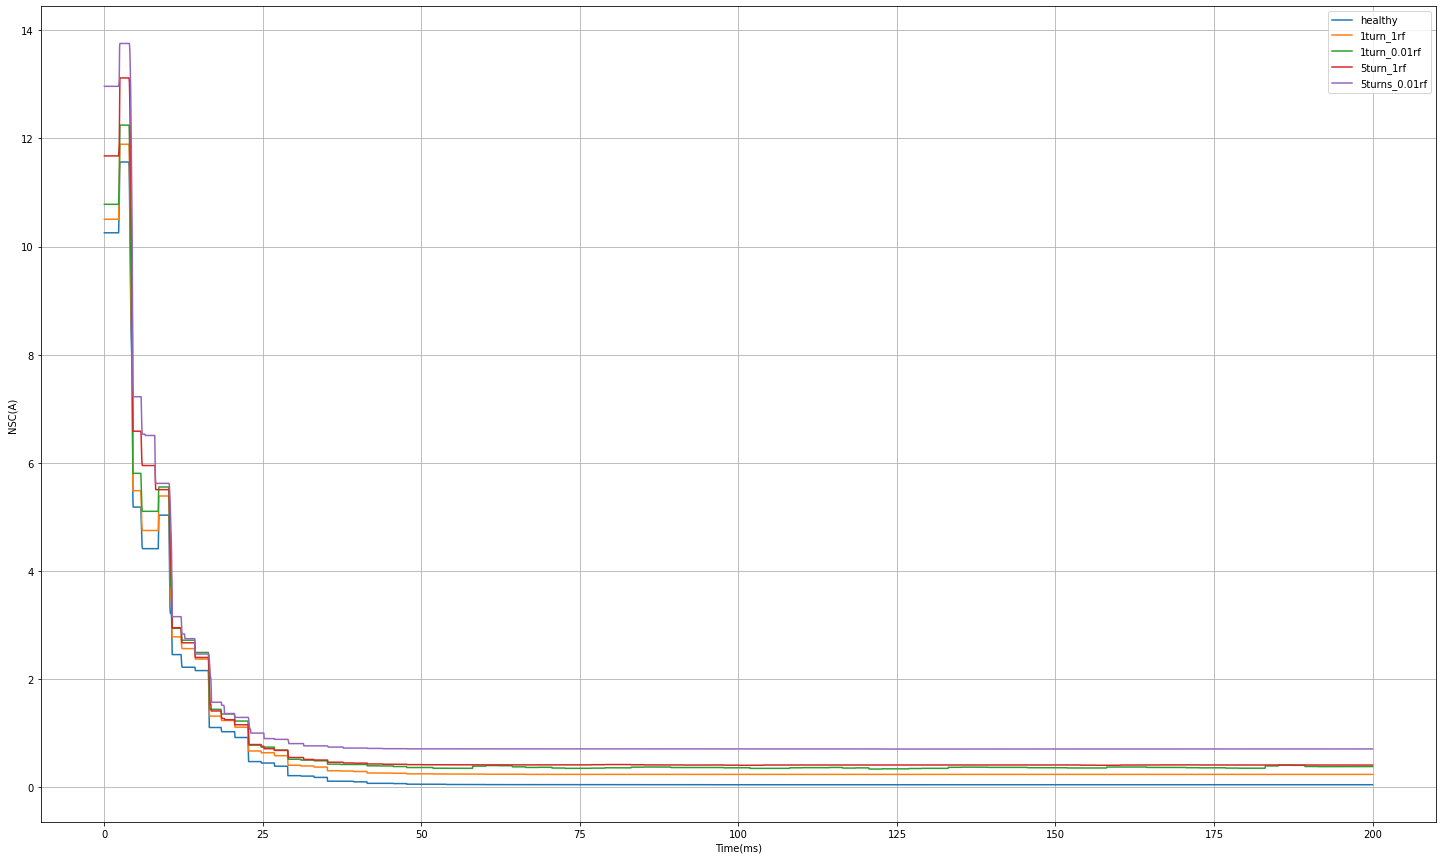

In [6]:
plt.figure(figsize=(25, 15))
plt.xlabel('Time(ms)')
plt.ylabel('NSC(A)')
plt.plot(preprocessed_healthy.dataset['Time [ms]'], preprocessed_healthy.dataset['NSC'], label='healthy')
plt.plot(preprocessed_1turn_1rf.dataset['Time [ms]'], preprocessed_1turn_1rf.dataset['NSC'], label='1turn_1rf')
plt.plot(preprocessed_1turn_1rf.dataset['Time [ms]'], preprocessed_1turn.dataset['NSC'], label='1turn_0.01rf')
plt.plot(preprocessed_1turn_1rf.dataset['Time [ms]'], preprocessed_5turns_1rf.dataset['NSC'], label='5turn_1rf')
plt.plot(preprocessed_1turn_1rf.dataset['Time [ms]'], preprocessed_5turns.dataset['NSC'], label='5turns_0.01rf')
plt.legend()
plt.grid(True)

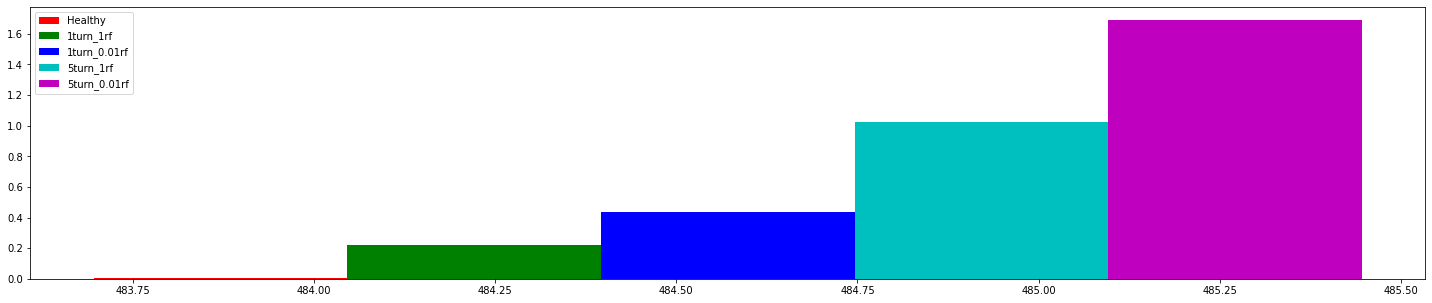

In [7]:
x_f, y_f = preprocessed_healthy.dft('Current(PhaseA) [A]')
x_f2, y_f2 = preprocessed_1turn_1rf.dft('Current(PhaseA) [A]')
x_f3, y_f3 = preprocessed_1turn.dft('Current(PhaseA) [A]')
x_f4, y_f4 = preprocessed_5turns_1rf.dft('Current(PhaseA) [A]')
x_f5, y_f5 = preprocessed_5turns.dft('Current(PhaseA) [A]')

bar_width = 0.35
plt.figure(figsize=(25, 5))
plt.bar(x_f[3], y_f[3], bar_width, color='r', label='Healthy')
plt.bar(x_f2[3] + bar_width, y_f2[3], bar_width, color='g', label='1turn_1rf')
plt.bar(x_f3[3] + 2*bar_width, y_f3[3], bar_width, color='b', label='1turn_0.01rf')
plt.bar(x_f4[3] + 3*bar_width, y_f4[3], bar_width, color='c', label='5turn_1rf')
plt.bar(x_f5[3] + 4*bar_width, y_f5[3], bar_width, color='m', label='5turn_0.01rf')
plt.legend()
plt.show()

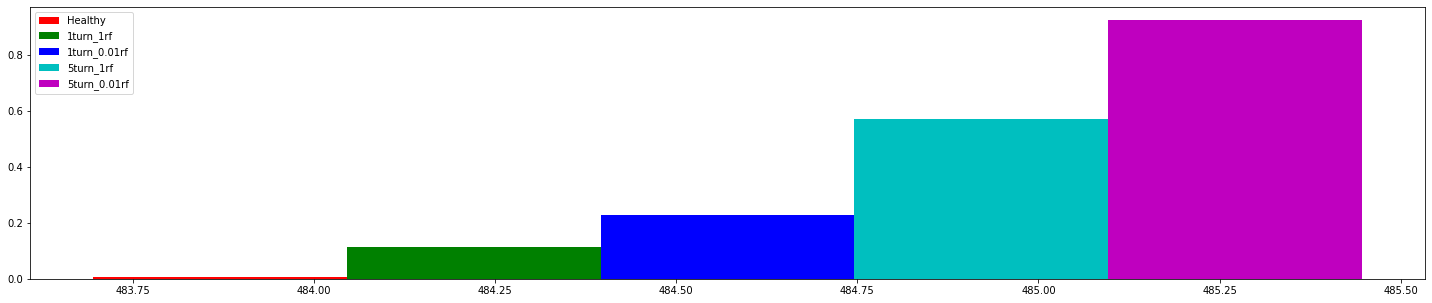

In [8]:
x_f, y_f = preprocessed_healthy.dft('Current(PhaseB) [A]')
x_f2, y_f2 = preprocessed_1turn_1rf.dft('Current(PhaseB) [A]')
x_f3, y_f3 = preprocessed_1turn.dft('Current(PhaseB) [A]')
x_f4, y_f4 = preprocessed_5turns_1rf.dft('Current(PhaseB) [A]')
x_f5, y_f5 = preprocessed_5turns.dft('Current(PhaseB) [A]')

bar_width = 0.35
plt.figure(figsize=(25, 5))
plt.bar(x_f[3], y_f[3], bar_width, color='r', label='Healthy')
plt.bar(x_f2[3] + bar_width, y_f2[3], bar_width, color='g', label='1turn_1rf')
plt.bar(x_f3[3] + 2*bar_width, y_f3[3], bar_width, color='b', label='1turn_0.01rf')
plt.bar(x_f4[3] + 3*bar_width, y_f4[3], bar_width, color='c', label='5turn_1rf')
plt.bar(x_f5[3] + 4*bar_width, y_f5[3], bar_width, color='m', label='5turn_0.01rf')
plt.legend()
plt.show()

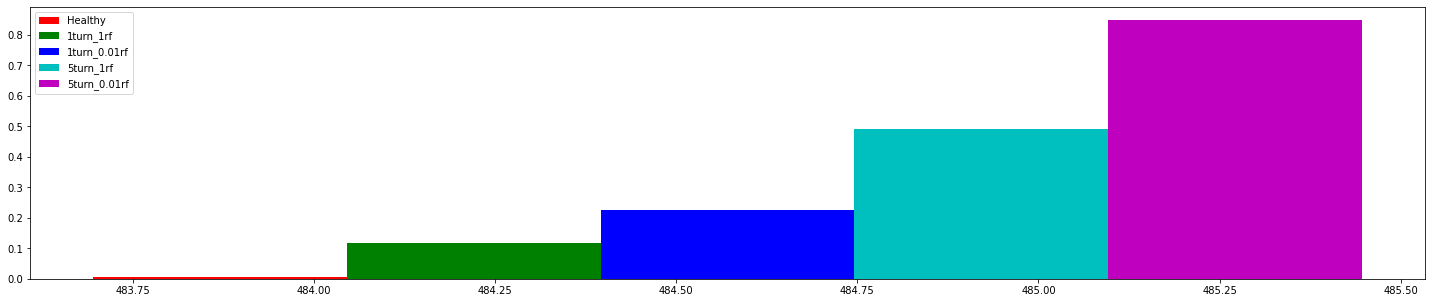

In [9]:
x_f, y_f = preprocessed_healthy.dft('Current(PhaseC) [A]')
x_f2, y_f2 = preprocessed_1turn_1rf.dft('Current(PhaseC) [A]')
x_f3, y_f3 = preprocessed_1turn.dft('Current(PhaseC) [A]')
x_f4, y_f4 = preprocessed_5turns_1rf.dft('Current(PhaseC) [A]')
x_f5, y_f5 = preprocessed_5turns.dft('Current(PhaseC) [A]')

bar_width = 0.35
plt.figure(figsize=(25, 5))
plt.bar(x_f[3], y_f[3], bar_width, color='r', label='Healthy')
plt.bar(x_f2[3] + bar_width, y_f2[3], bar_width, color='g', label='1turn_1rf')
plt.bar(x_f3[3] + 2*bar_width, y_f3[3], bar_width, color='b', label='1turn_0.01rf')
plt.bar(x_f4[3] + 3*bar_width, y_f4[3], bar_width, color='c', label='5turn_1rf')
plt.bar(x_f5[3] + 4*bar_width, y_f5[3], bar_width, color='m', label='5turn_0.01rf')
plt.legend()
plt.show()